In [27]:
import os

if not os.path.abspath("").endswith("src"):
    notebook_dir = os.path.join(os.path.abspath(""), "..")

    # Change the CWD to the notebook's directory
    %cd $notebook_dir

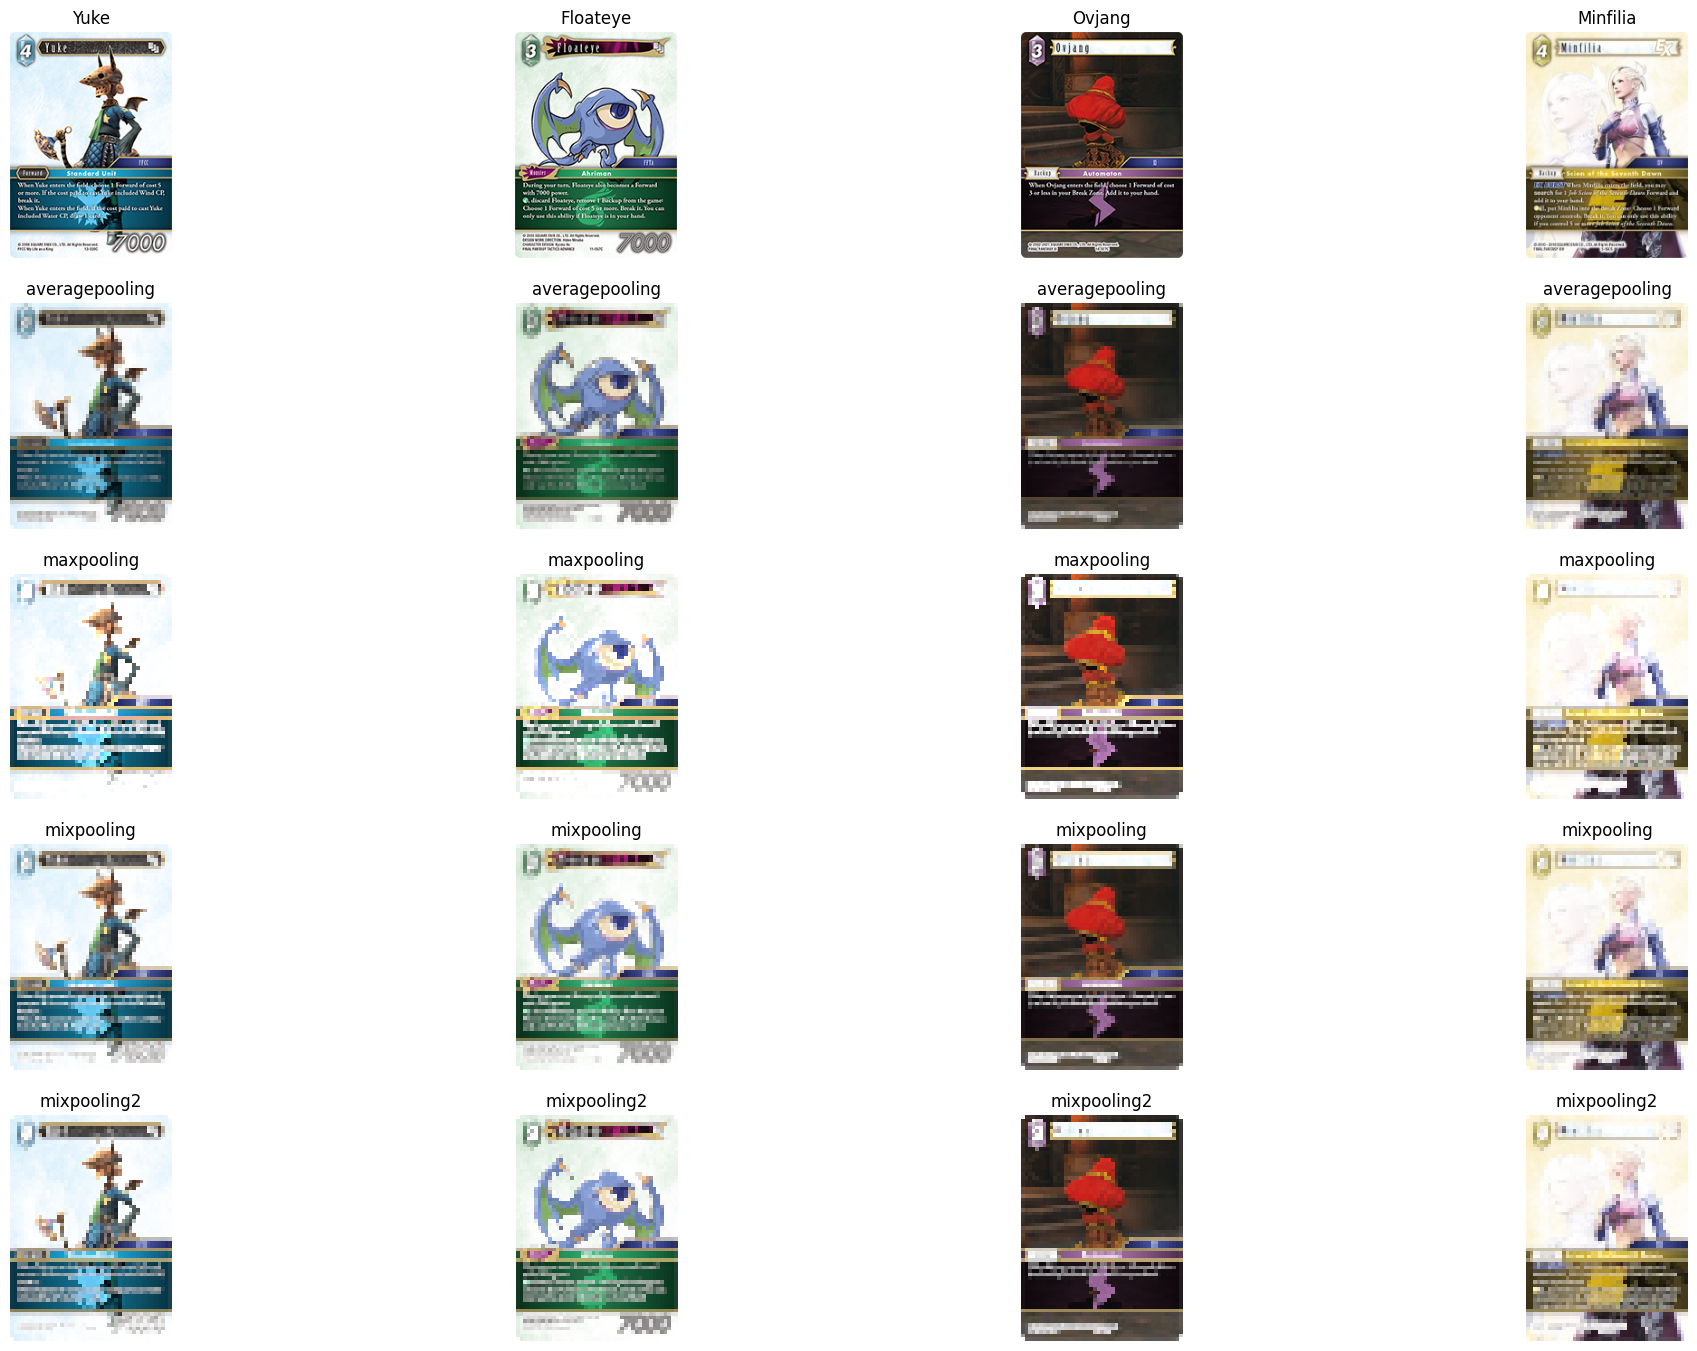

In [28]:
%matplotlib inline

import tensorflow as tf
from keras import layers
from skimage.io import imread
from matplotlib import pyplot as plt

from data.dataset import imagine_database

# pick a random images
df = imagine_database()

# Ignore by language
# df = df.query(f"~filename.str.contains('_eg')")  # English
df = df.query(f"~filename.str.contains('_fr')")  # French
df = df.query(f"~filename.str.contains('_es')")  # Spanish
df = df.query(f"~filename.str.contains('_it')")  # Italian
df = df.query(f"~filename.str.contains('_de')")  # German
df = df.query(f"~filename.str.contains('_jp')")  # Japanese

df = df.sample(4)
imgs = [imread(uri) for uri in df["filename"]]
imgs = tf.image.resize(imgs, (250, 179))
imgs = layers.Rescaling(scale=1. / 255)(imgs)

fig = plt.figure(figsize=(25, 17))

for i, img in enumerate(imgs):
    fig.add_subplot(5, 4, i + 1)
    plt.axis('off')
    plt.imshow(img)
    plt.title(df.iloc[i]["name_en"])
        

avg_images = layers.AveragePooling2D(padding="same")(imgs)
avg_images = layers.AveragePooling2D(padding="same")(avg_images)
# avg_images = layers.UpSampling2D(interpolation="bilinear")(avg_images)
for i, img in enumerate(avg_images):
    fig.add_subplot(5, 4, i + 5)
    plt.axis('off')
    plt.imshow(img)
    plt.title("averagepooling")

max_images = layers.MaxPooling2D(padding="same")(imgs)
max_images = layers.MaxPooling2D(padding="same")(max_images)
# max_images = layers.UpSampling2D(interpolation="bilinear")(max_images)
for i, img in enumerate(max_images):
    fig.add_subplot(5, 4, i + 9)
    plt.axis('off')
    plt.imshow(img)
    plt.title("maxpooling")
    
mix_images = layers.MaxPooling2D(padding="same")(imgs)
mix_images = layers.AveragePooling2D(padding="same")(mix_images)
#mix_images = layers.UpSampling2D(interpolation="bilinear")(mix_images)
# mix_images = layers.UpSampling2D(interpolation="bilinear")(mix_images)
for i, img in enumerate(mix_images):
    fig.add_subplot(5, 4, i + 13)
    plt.axis('off')
    plt.imshow(img)
    plt.title("mixpooling")
    
mix_images2 = layers.AveragePooling2D(padding="same")(imgs)
mix_images2 = layers.MaxPooling2D(padding="same")(mix_images2)
# mix_images2 = layers.UpSampling2D(interpolation="bilinear")(mix_images2)
# mix_images2 = layers.UpSampling2D(interpolation="bilinear")(mix_images2)
for i, img in enumerate(mix_images2):
    fig.add_subplot(5, 4, i + 17)
    plt.axis('off')
    plt.imshow(img)
    plt.title("mixpooling2")

In [29]:
import json

import numpy as np
from keras.models import load_model

from models import MODEL_DIR

model = load_model(os.path.join(MODEL_DIR, "type_en_1.h5"))

x = model.predict(imgs)
with open(os.path.join(MODEL_DIR, "type_en.json")) as fp:
    labels = json.load(fp)
print(list(labels[np.argmax(y)] for y in x))

1/1 [==============================] - 0s 86ms/step
['Forward', 'Monster', 'Backup', 'Backup']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


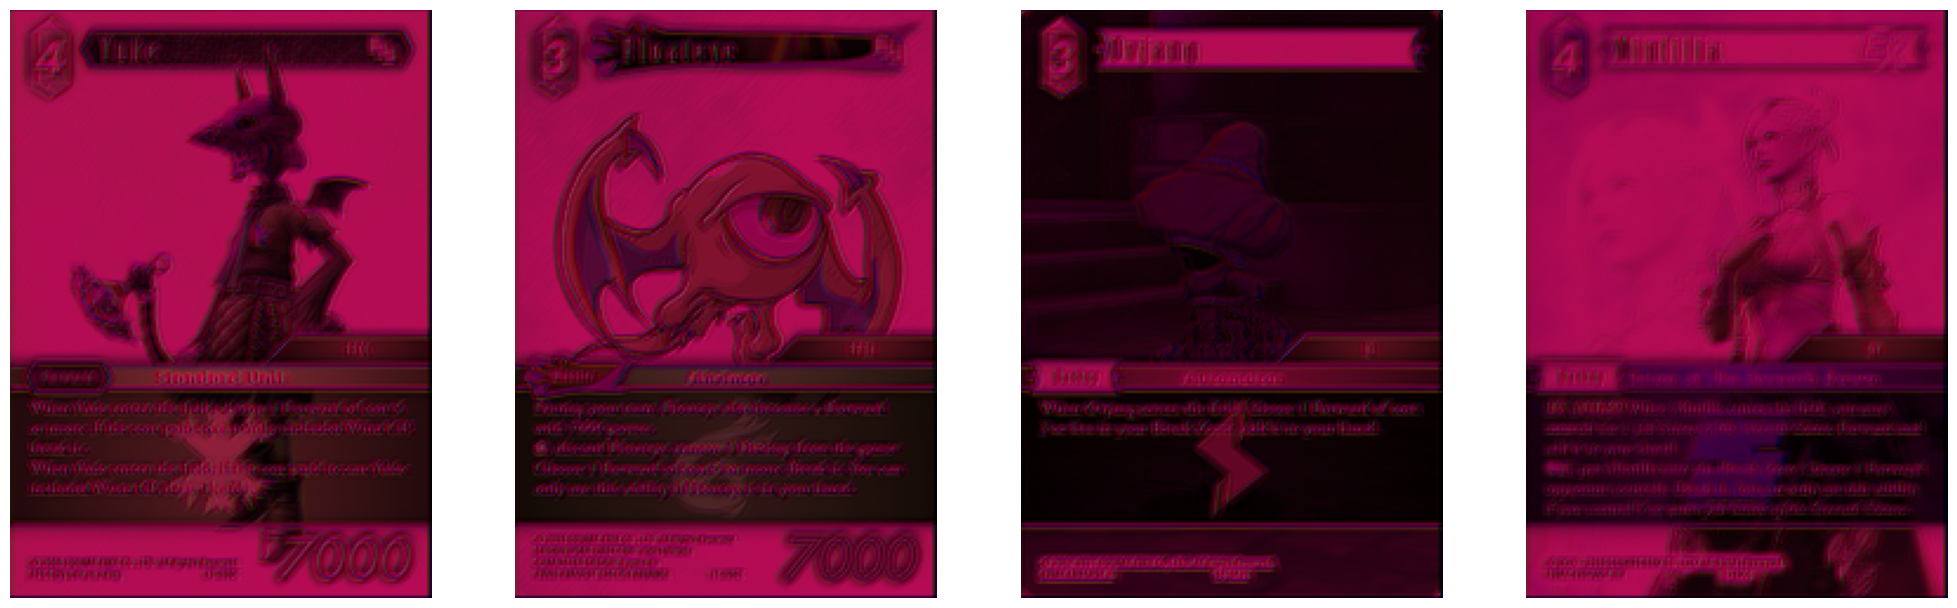

In [68]:
# Experimental investigation in to seeing what the model has learned

fig = plt.figure(figsize=(25, 17))

x = imgs[:]
for layer in model.layers:
    if isinstance(layer, layers.Flatten): break
    print(layer)
    x = layer(x)
    # print(images)
    # weights, bias = layer.get_weights()
    viz = layers.Conv2DTranspose(3, (3, 3), padding='same', activation=None)(x)
    # viz.set_weights(weights)
    # viz = viz(imgs) + bias
    # print(viz.shape)
    # print(bias.shape)
    # viz = layers.Conv1D(3, 3, padding='same', activation=None, use_bias=False)(x)
    for i, v in enumerate(viz):
        fig.add_subplot(1, 4, i + 1)
        plt.axis('off')
        plt.imshow(v)
        # plt.title(df.iloc[i]["name_en"])
    break